Importing libraries



In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.corpus import movie_reviews
import tweepy                  #for accessing twitter API
from textblob import TextBlob  #processing textual data
from wordcloud import WordCloud  #frequency/importance of words in text data
import pandas as pds             #for working with relational data
import numpy as np              #for arrays and matrices
import re                        #regular expressions
import matplotlib.pyplot as plt   #for plotting
plt.style.use('seaborn-talk');
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Scrapping twitter for Tesla tweets

In [ ]:
query = "(to:Tesla) until:2022-04-01 since:2014-01-01"
tweets = []
limit = 15000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     if len(tweets) == limit:
        break
     else:
        tweets.append([tweet.date, tweet.username, tweet.content])

In [ ]:
data = pds.DataFrame(tweets, columns=['Date', 'User', 'text'])
print(data)

                           Date          User  \
0     2022-03-31 23:53:56+00:00       KStewlv   
1     2022-03-31 23:41:33+00:00        ytkken   
2     2022-03-31 23:37:28+00:00    masonsiked   
3     2022-03-31 23:21:58+00:00    MakoMeraki   
4     2022-03-31 22:40:12+00:00        spleck   
...                         ...           ...   
14995 2021-12-25 18:15:18+00:00     Johanpuff   
14996 2021-12-25 18:13:53+00:00      dguevar1   
14997 2021-12-25 18:13:01+00:00  JosephChukzy   
14998 2021-12-25 18:11:34+00:00  GailAlfarATX   
14999 2021-12-25 18:07:33+00:00  SanjayBDalal   

                                                    text  
0      @Tesla Your next software update for Model S s...  
1      @Tesla I need off this 44.30.21 Christmas Eve ...  
2               @Tesla why are your cup holders so small  
3      @Tesla should team up with @Walmart and conver...  
4      @Tesla Reddit: "A new Tesla subscription servi...  
...                                                  ... 

Saving scrapped texts to file

In [ ]:
from google.colab import files
data.to_csv('teslatweets.csv')
files.download('teslatweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaning texts

In [ ]:
#function to clean data
def clean(n):
  n= re.sub(r'@[a-zA-Z0-9_]+', '', n)# getting rid of @mentions
  n= re.sub(r'#', '', n)# getting rid of #
  n= re.sub(r':', '', n)# getting rid of #
  n= re.sub(r'RT[\s]+', '', n)# getting rid of retweets
  n= re.sub(r'https?:\/\/\S+', '', n)# getting rid of links
  n= re.sub(r'https?\/\/\S+', '', n)# getting rid of links
  return n
#cleaning
data['text']=data['text'].apply(clean)

Removing emojis

In [ ]:
#remove emojis and non-ascii characters
def remEmoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
data['text']=data['text'].apply(remEmoji)
data.tail()

,Date,User,text
14995,2021-12-25 18:15:18+00:00,Johanpuff,Tetris Effect would be an amazing addition t...
14996,2021-12-25 18:13:53+00:00,dguevar1,", We tried FSD Beta for the first time. It doe..."
14997,2021-12-25 18:13:01+00:00,JosephChukzy,Awesomely beautiful...
14998,2021-12-25 18:11:34+00:00,GailAlfarATX,"I cant wait to do this, this is such an aweso..."
14999,2021-12-25 18:07:33+00:00,SanjayBDalal,Please bring back the single tap for Wiper co...


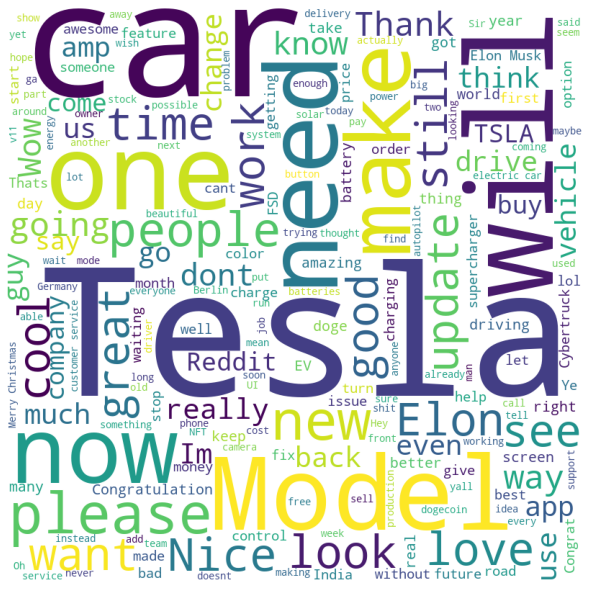

In [ ]:
#word cloud
wc=' '.join([txt for txt in data['text']])
#stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, random_state=21,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wc)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


Removing unnecessary columns and converting to lowercase

In [ ]:
def preprocess_data(data):
    # Remove date as it's not relevant
    data = data.drop('Date', axis=1)
    # Remove user colum as it's not relevant
    data = data.drop('User', axis=1)
    
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data
dt = preprocess_data(data)
dat=preprocess_data(data)
dt

,text
0,your next software update for model s should r...
1,i need off this 44.30.21 christmas eve build. ...
2,why are your cup holders so small
3,should team up with and convert parking lots ...
4,"reddit ""a new tesla subscription service is co..."
...,...
14995,tetris effect would be an amazing addition to ...
14996,", we tried fsd beta for the first time. it doe..."
14997,awesomely beautiful...
14998,"i cant wait to do this, this is such an awesom..."


Downloading twitter samples

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

Storing testing data for positive and negative tweets

In [ ]:
# select the set of positive and negative tweets
apt = twitter_samples.strings('positive_tweets.json')
ant = twitter_samples.strings('negative_tweets.json')
pos = pds.DataFrame(apt)
neg = pds.DataFrame(ant)
from google.colab import files
neg.to_csv('neg.csv')
files.download('neg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Number of positive tweets: ', len(apt))
print('Number of negative tweets: ', len(ant))

print('\nThe type of all_positive_tweets is: ', type(apt))
print('The type of a tweet entry is: ', type(ant[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


Tokenizing method

In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenizing(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens

Removing stopwords method

In [ ]:
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remstop(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

Stemming method

In [ ]:
stemmer = PorterStemmer()

def stemming(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

Combining the methods above

In [ ]:
#combining the methods above
def process_tweet(tweet):
    
    tweet_tokens = tokenizing(tweet)
    tweets_clean = remstop(tweet_tokens)
    ptweets = stemming(tweets_clean)
    
    return ptweets

processing tweets

In [ ]:
#cleaning
dt['text']=dt['text'].apply(process_tweet)
dt

,text
0,"[next, softwar, updat, model, remov, emiss, fe..."
1,"[need, 44.30, 21, christma, eve, build, fsdbet..."
2,"[cup, holder, small]"
3,"[team, convert, park, lot, supercharg, station..."
4,"[reddit, new, tesla, subscript, servic, come, ..."
...,...
14995,"[tetri, effect, would, amaz, addit, game, tesla]"
14996,"[tri, fsd, beta, first, time, realli, well, ti..."
14997,"[awesom, beauti, ...]"
14998,"[cant, wait, awesom, upgrad, softwar, thank]"


In [ ]:
datary=[]
for name in dt['text']:
    words=str(name).split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    datary+=stripped
print(datary)

['next', 'softwar', 'updat', 'model', 'remov', 'emiss', 'featur', 'bring', 'back', 'caraok', 'need', '4430', '21', 'christma', 'eve', 'build', 'fsdbeta', 'reason', 'need', '1011', '1', 'im', 'good', '1010', '2', 'time', 'fix', 'bug', 'version', '11', 'cup', 'holder', 'small', 'team', 'convert', 'park', 'lot', 'supercharg', 'station', 'averag', 'lot', 'locat', '5', 'acr', 'imagin', 'potenti', 'reddit', 'new', 'tesla', 'subscript', 'servic', 'come', 'select', 'us', 'citi', 'start', '995', 'per', 'month', 'underestim', 'anyon', 'even', 'small', 'ant', 'make', 'eleph', 'danc', 'like', 'idea', 'someon', 'program', 'robot', 'wriggl', 'around', 'like', 'real', 'butt', 'elonmusk', 'probabl', 'like', 'wriggli', 'enough', 'start', 'dammit', 'tesla', 'new', 'punch', 'buggi', 'ghc', 'uucak', 'get', 'tesla', '', '', 'rig', 'perspir', 'salt', 'water', 'jean', 'test', 'like', 'human', 'would', 'pad', 'made', 'denim', 'cuz', 'that', 'seriou', 'attent', 'custom', 'concern', 'ein', 'scheie', 'manchester

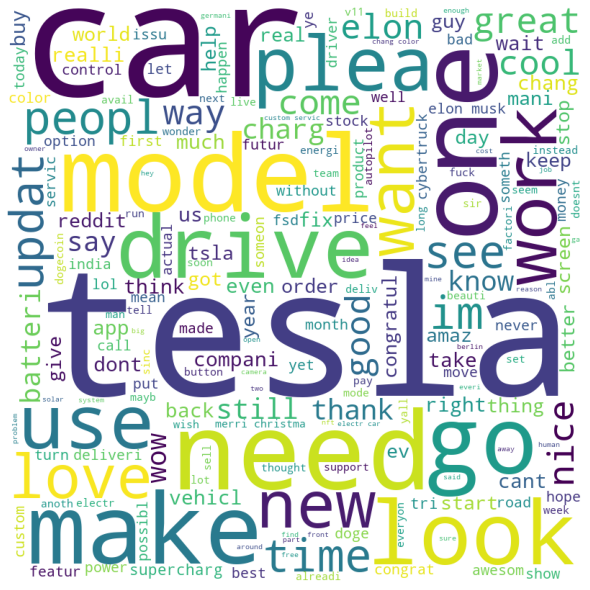

In [ ]:
#word cloud
wrc=' '.join([txt for txt in datary])
#stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, random_state=21,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wrc)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Creating a frequency dictionary

In [ ]:
def crefreq(tweets, ys):
    
    freq_d = {}

    # TODO: Create frequency dictionary
    ...
    for tweet,y in zip(tweets,ys):
      for word in process_tweet(tweet):
        pair=(word,y)
        if pair in freq_d:
          freq_d[pair]+=1
        else:
          freq_d[pair]=freq_d.get(pair,1)
    return freq_d

Testing the frequency dictionary

In [ ]:
tweet = ['i am glad', 'i am tricked', 'i am sad', 'i am tired', 'i am tired','i am happy']
ys = [1, 0, 0, 0, 0,1]

freq_d = crefreq(tweet, ys)
print(freq_d)

{('glad', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2, ('happi', 1): 1}


Training data

In [ ]:
train_pos = apt
train_neg = ant
train_x = train_pos + train_neg
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
print(train_y)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
freqs = crefreq(train_x, train_y)
print(freqs)

{('#followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 32, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 68, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 5, ('profil', 1.0): 2, ('15', 1.0): 4, ('day', 1.0): 245, ('one', 1.0): 131, ('irresist', 1.0): 2, ('#flipkartfashionfriday', 1.0): 17, ('http://t.co/ebz0l2venm', 1.0): 1, ('like', 1.0): 232, ('keep', 1.0): 68, ('love', 1.0): 398, ('custom'

Naive Bayes Training Method

In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1]>0:
          N_pos+=freqs[(pair)]
        else:
          N_neg+=freqs[(pair)] 
    # TODO: calculate the number of documents (tweets)
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents (tweets)
    D_pos = sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents (tweets)
    D_neg = D-sum(train_y)
    
    # TODO: calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg =  freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood

In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))
print(loglikelihood)

0.0
12432
{'gail': 0.6640241217346765, 'asid': 0.6640241217346765, '3:33': -1.1277353474933784, 'argo': 0.6640241217346765, 'sikandar': 0.6640241217346765, 'shine': 0.6640241217346765, '#tgp1': 0.6640241217346765, 'properti': 1.0694892298428407, 'cactu': -0.7222702393852141, 'nudg': -0.029123058825268798, 'life-so': 0.6640241217346765, 'perf': -1.1277353474933784, 'http://t.co/mgayutmknz': 0.6640241217346765, '#tiredashel': -0.7222702393852141, 'sm1': -0.7222702393852141, '87.7': -0.7222702393852141, 'https://t.co/inhuy4fkdg': 0.6640241217346765, 'iyalaya': -0.7222702393852141, '9pm': -0.029123058825268798, 'gamer': 1.357171302294622, 'chao': 0.6640241217346765, '4pm': 0.6640241217346765, 'appendix': -0.7222702393852141, 'ा': -1.1277353474933784, 'identifi': 0.6640241217346765, 'babi': -0.8558016320097368, 'x7': 0.6640241217346765, 'lollipop': 0.6640241217346765, 'http://t.co/mdubl7czxq': 0.6640241217346765, 'http://t.co/qv2dwdbgi3': 0.6640241217346765, 'http://t.co/asq9nn4axr': -0.722

Function to generate sentiment

In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
  
    # TODO: process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # TODO: initialize probability to zero
    p = 0

    # TODO: add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if word in loglikelihood:
          p+=loglikelihood[word]

    return p

In [ ]:
print(type(loglikelihood))
print(type(logprior))
print(loglikelihood["horton'"])

<class 'dict'>
<class 'numpy.float64'>
-0.7222702393852141


Testing the Naive Bayes model with mew unsupervised tweet data

In [ ]:
#array to store results
results=[]
for tweet in dat['text']:
    a = naive_bayes_predict(tweet, logprior, loglikelihood)
    results.append([tweet,a])
    print(f'{tweet} -> {a:.2f}')

Streaming output truncated to the last 5000 lines.
this is such an amazing innovation -> 1.75
ion like the new car screen updates, this shit not an iphone dawg. change it back -> -1.18
$tsla $tslaq 

labor laws do not exist in china ccp master decide.

godelon also told that in germany ccp labor laws rule. 

govt of berlinbrandenburg  agree after a thrilling experience with sec -> 2.84
ecowestdriven ecowest driven | parksville, b.c. tesla vancouver island -> 0.34
 -> 0.00
s accident data -> -2.54
how does that compare to gas stations? -> 0.83
well this sucks.. -> -0.42
q4 2020 comparison
avg autopilot driver crashed once every 3.45 million miles 

avg tesla driver crashed once every 2.05 million miles

avg us driver crashed once every 484,000 miles 
tesla -> -3.54
when you relasing the fleshlite mod for the cybertruck -> 0.00
here u go -> -0.21
too bad it doesnt keep the rain out. my friends house has to be gutted from all the water damage and still no contact from . saw this article t

Dataframe for Naive bayes testing result

In [ ]:
res= pds.DataFrame(results, columns=['text', 'sentiment'])
res

,text,sentiment
0,your next software update for model s should r...,0.163953
1,i need off this 44.30.21 christmas eve build. ...,1.651127
2,why are your cup holders so small,0.318096
3,should team up with and convert parking lots ...,4.249503
4,"reddit ""a new tesla subscription service is co...",4.559777
...,...,...
14995,tetris effect would be an amazing addition to ...,0.424148
14996,", we tried fsd beta for the first time. it doe...",-4.680885
14997,awesomely beautiful...,3.194171
14998,"i cant wait to do this, this is such an awesom...",3.519764


Plotting the sentiments vs the number of tweets

<function matplotlib.pyplot.show>

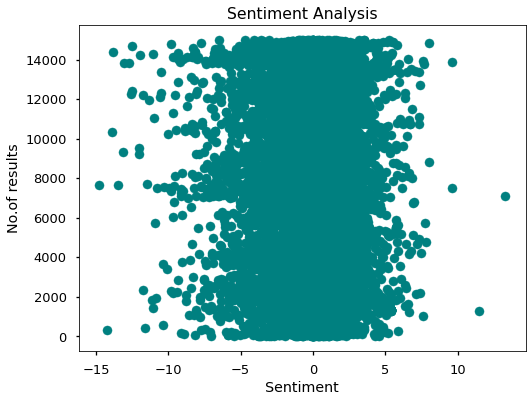

In [ ]:
#plot polarity and subjectivite
plt.figure(figsize=(8,6))
for i in range(0,res.shape[0]):
  plt.scatter(res['sentiment'][i],[i],color='teal')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('No.of results')
plt.show

Generating polarity

In [ ]:
#positive,neutral and negative analysis
def analysis(dig):
  if dig>0:
    return 'Positive'
  elif dig==0:
    return 'neutral'
  else:
    return 'Negative'

#create new dataframe column to store analysis
res['Polarity']=res['sentiment'].apply(analysis)
res

,text,sentiment,Polarity
0,your next software update for model s should r...,0.163953,Positive
1,i need off this 44.30.21 christmas eve build. ...,1.651127,Positive
2,why are your cup holders so small,0.318096,Positive
3,should team up with and convert parking lots ...,4.249503,Positive
4,"reddit ""a new tesla subscription service is co...",4.559777,Positive
...,...,...,...
14995,tetris effect would be an amazing addition to ...,0.424148,Positive
14996,", we tried fsd beta for the first time. it doe...",-4.680885,Negative
14997,awesomely beautiful...,3.194171,Positive
14998,"i cant wait to do this, this is such an awesom...",3.519764,Positive


<function matplotlib.pyplot.show>

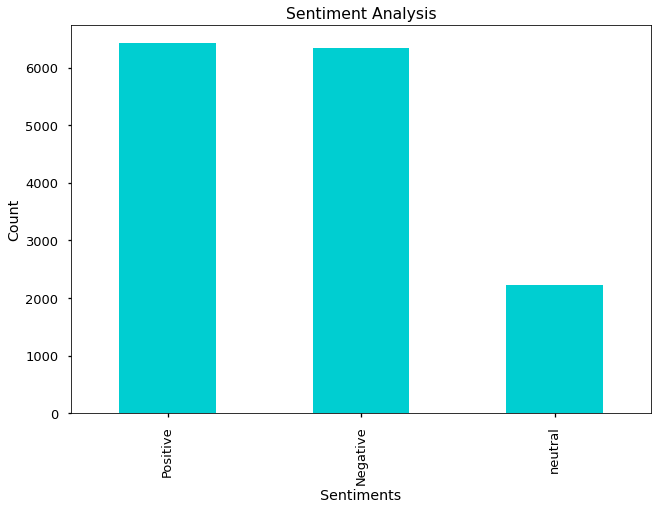

In [ ]:
#show counts
res['Polarity'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
res['Polarity'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show

In [ ]:
res['Polarity'].value_counts()

Positive    6420
Negative    6346
neutral     2234
Name: Polarity, dtype: int64

Testing accuracy of the analysis result on unsuppervised data

In [ ]:

from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
#splitting the data
x = res['text']
y = res['Polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)
testac=model.score(x_test, y_test)
model.score(x_test, y_test)


0.676

Testing accuracy on the training data

In [ ]:
t_pos = apt[3000:]
t_neg = ant[:3000]
te_pos = apt[3000:]
te_neg = ant[:3000]
t_x = t_pos + t_neg
te_x = te_pos + te_neg
t_y = np.append(np.ones(len(t_pos)), np.zeros(len(t_neg)))
te_y = np.append(np.ones(len(te_pos)), np.zeros(len(te_neg)))
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
tr_x = vec.fit_transform(t_x).toarray()
tes_x = vec.transform(te_x).toarray()
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(tr_x, t_y)
trainac=model.score(tes_x, te_y)
model.score(tes_x, te_y)


0.95

Support Vector Machine

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn import svm
from sklearn.metrics import classification_report



# train Data
trainData = pds.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/train.csv")

# test Data
testData = pds.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/test.csv")

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(trainData['Content'])
test_vectors = vectorizer.transform(testData['Content'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Results for SVC(kernel=linear)
Training time: 10.567334s; Prediction time: 0.938877s
positive:  {'precision': 0.9191919191919192, 'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100}
negative:  {'precision': 0.9108910891089109, 'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100}


In [ ]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['pos']


In [ ]:
svmresults=[]
for tweet in dat['text']:
    review_vector = vectorizer.transform([tweet]) # vectorizing
    b=classifier_linear.predict(review_vector)
    svmresults.append([tweet,b])
    #print(classifier_linear.predict(review_vector))
    
#svmresults

In [ ]:
svmresults
#svmres['Polarity']=res['sentiment'].apply(analysis)
#svmres= pds.DataFrame(results, columns=['text', 'sentiment'])

[['your next software update for model s should remove the emissions feature and bring back the caraoke',
  array(['neg'], dtype=object)],
 ["i need off this 44.30.21 christmas eve build. fsdbeta this is the only reason i need 10.11.1. i'm good with 10.10.2 but it's time to fix some bugs off this version 11.",
  array(['neg'], dtype=object)],
 ['why are your cup holders so small', array(['neg'], dtype=object)],
 ['should team up with  and convert parking lots to supercharging stations. \non a average each lot is location is 5 acres, imagine the potential.',
  array(['neg'], dtype=object)],
 ['reddit "a new tesla subscription service is coming to select us cities starting at $995 per month"',
  array(['pos'], dtype=object)],
 ["don't underestimate anyone, because even a small ant can make elephant dance.",
  array(['neg'], dtype=object)],
 ['i like the idea that someone had to program a robot to wriggle around like a real butt. then elonmusk was probably like,"it\'s not wriggly enough!!

In [ ]:
svmres= pds.DataFrame(svmresults, columns=['text', 'sentiment'])

In [ ]:
svmres

,text,sentiment
0,your next software update for model s should r...,[neg]
1,i need off this 44.30.21 christmas eve build. ...,[neg]
2,why are your cup holders so small,[neg]
3,should team up with and convert parking lots ...,[neg]
4,"reddit ""a new tesla subscription service is co...",[pos]
...,...,...
14995,tetris effect would be an amazing addition to ...,[neg]
14996,", we tried fsd beta for the first time. it doe...",[pos]
14997,awesomely beautiful...,[pos]
14998,"i cant wait to do this, this is such an awesom...",[pos]


In [ ]:
#positive,neutral and negative analysis
def clr(dig):
  if dig=='pos':
    return 'Positive'
  elif dig=='neg':
    return 'Negative'
  

#create new dataframe column to store analysis

svmres['sentiment']=svmres['sentiment'].apply(clr)
svmres

,text,sentiment
0,your next software update for model s should r...,Negative
1,i need off this 44.30.21 christmas eve build. ...,Negative
2,why are your cup holders so small,Negative
3,should team up with and convert parking lots ...,Negative
4,"reddit ""a new tesla subscription service is co...",Positive
...,...,...
14995,tetris effect would be an amazing addition to ...,Negative
14996,", we tried fsd beta for the first time. it doe...",Positive
14997,awesomely beautiful...,Positive
14998,"i cant wait to do this, this is such an awesom...",Positive


<function matplotlib.pyplot.show>

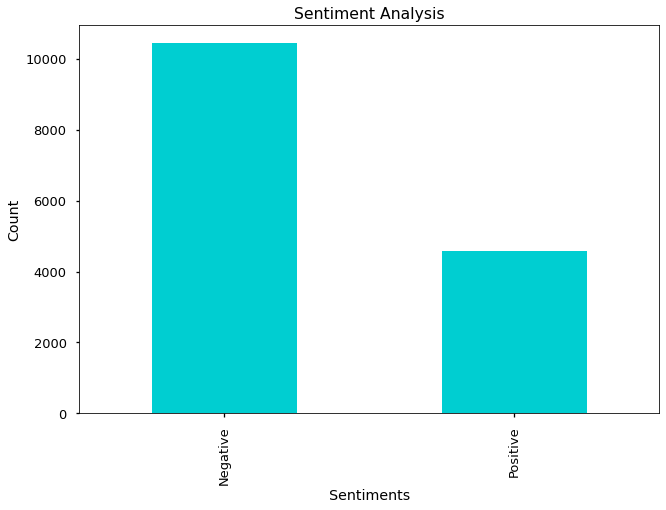

In [ ]:
#show counts
svmres['sentiment'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
svmres['sentiment'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show

Second SVM Machine

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
t_x.shape

(5000, 11659)

In [ ]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(t_x, t_y)
svmac=grid_svm.score(te_x, te_y)
grid_svm.score(te_x, te_y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.9091395833333333

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
def rep_res(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'accuracy': acc, 'precision': prec, 'recall': rec}
    return result
strres=[]
strres=rep_res(grid_svm.best_estimator_, t_x, t_y)
rep_res(grid_svm.best_estimator_, t_x, t_y)

{'accuracy': 0.8386,
 'auc': 0.9091419166666668,
 'f1': 0.8036018495984425,
 'precision': 0.7828354670459934,
 'recall': 0.8255}

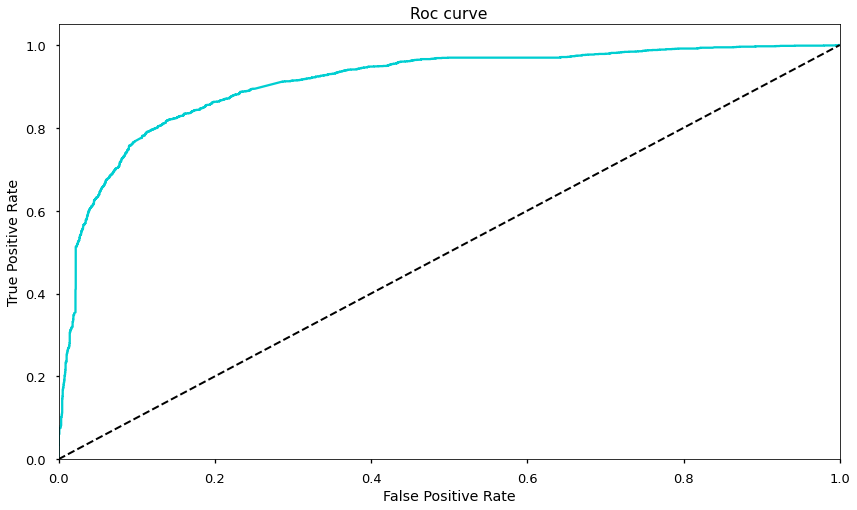

In [ ]:
def get_curve(model, X, y):
    predict_probability = model.predict_proba(X)[:, 1]
    fpred, tpred, _ = roc_curve(y, predict_probability)
    return fpred, tpred
roc_svm = get_curve(grid_svm.best_estimator_, t_x, t_y)
fpred, tpred = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpred, tpred, color="darkturquoise")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, t_x, t_y, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

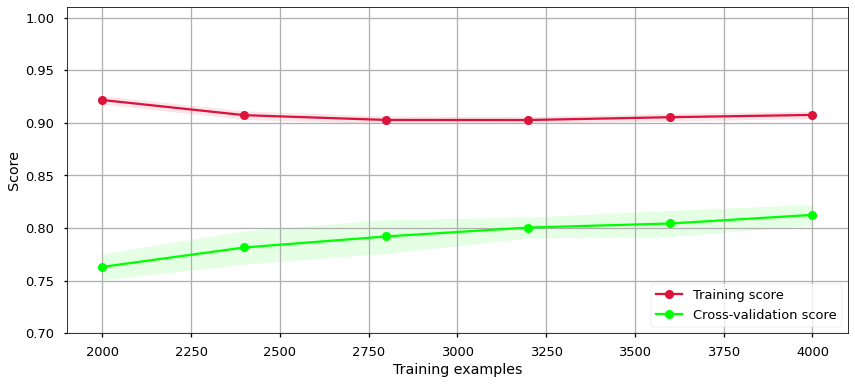

In [ ]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="crimson")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="lime")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="crimson",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="lime",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt
plot_learning_curve(train_x, train_y, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

Analysis of the Tesla tweets

In [ ]:
#for each tweet in tesla tweets column 
supvec=[]
for tweet in dat['text']:
    c=grid_svm.predict([tweet])
    supvec.append([tweet,c])
supportvect= pds.DataFrame(supvec, columns=['text', 'sentiment'])
supportvect

,text,sentiment
0,your next software update for model s should r...,[1.0]
1,i need off this 44.30.21 christmas eve build. ...,[0.0]
2,why are your cup holders so small,[0.0]
3,should team up with and convert parking lots ...,[1.0]
4,"reddit ""a new tesla subscription service is co...",[0.0]
...,...,...
14995,tetris effect would be an amazing addition to ...,[1.0]
14996,", we tried fsd beta for the first time. it doe...",[1.0]
14997,awesomely beautiful...,[1.0]
14998,"i cant wait to do this, this is such an awesom...",[1.0]


In [ ]:
#positive,neutral and negative analysis
def check(dig):
  if dig==1.0:
    return 'Positive'
  elif dig==0.0:
    return 'Negative'
  

#create new dataframe column to store analysis

supportvect['sentiment']=supportvect['sentiment'].apply(check)
supportvect

,text,sentiment
0,your next software update for model s should r...,Positive
1,i need off this 44.30.21 christmas eve build. ...,Negative
2,why are your cup holders so small,Negative
3,should team up with and convert parking lots ...,Positive
4,"reddit ""a new tesla subscription service is co...",Negative
...,...,...
14995,tetris effect would be an amazing addition to ...,Positive
14996,", we tried fsd beta for the first time. it doe...",Positive
14997,awesomely beautiful...,Positive
14998,"i cant wait to do this, this is such an awesom...",Positive


To show results of Second SVM analysis

<function matplotlib.pyplot.show>

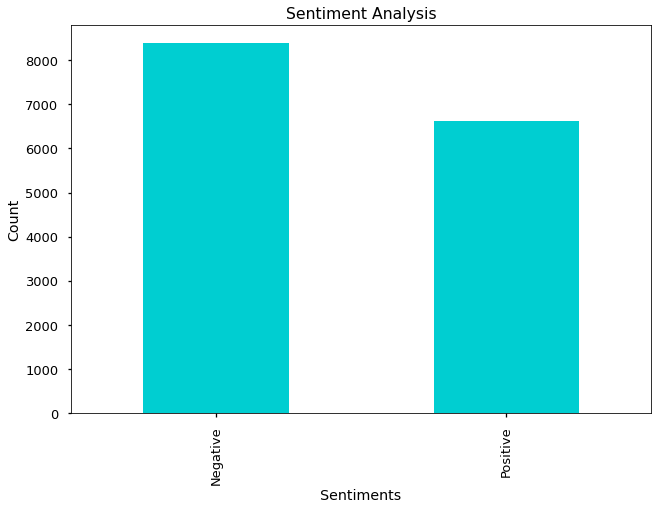

In [ ]:
#show counts
supportvect['sentiment'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
supportvect['sentiment'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show

In [ ]:
supportvect['sentiment'].value_counts()

Negative    8381
Positive    6619
Name: sentiment, dtype: int64

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid = {'clf__C': [0.01, 0.1, 1]},
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


In [ ]:
gs_lr_tfidf.fit(t_x, t_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1, param_grid={'clf__C': [0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
#calculating the accuracy of the logistic model
calcacc = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % calcacc.score(t_x, t_y))
logacc=calcacc.score(t_x, t_y)

Accuracy in test: 0.890


In [ ]:
#for each tweet in amazon text column determine its sentiment
text=dat['text']
log_mod=[]
pred_log = calcacc.predict(dat['text'])
for i in range(len(text)):
    log_mod.append([text[i],pred_log[i]])
logisticreg= pds.DataFrame(log_mod, columns=['text', 'sentiment'])
logisticreg

,text,sentiment
0,your next software update for model s should r...,1.0
1,i need off this 44.30.21 christmas eve build. ...,0.0
2,why are your cup holders so small,0.0
3,should team up with and convert parking lots ...,0.0
4,"reddit ""a new tesla subscription service is co...",0.0
...,...,...
14995,tetris effect would be an amazing addition to ...,1.0
14996,", we tried fsd beta for the first time. it doe...",0.0
14997,awesomely beautiful...,0.0
14998,"i cant wait to do this, this is such an awesom...",1.0


Converting the number to sentiment

In [ ]:
logisticreg['sentiment']=logisticreg['sentiment'].apply(check)
logisticreg

,text,sentiment
0,your next software update for model s should r...,Positive
1,i need off this 44.30.21 christmas eve build. ...,Negative
2,why are your cup holders so small,Negative
3,should team up with and convert parking lots ...,Negative
4,"reddit ""a new tesla subscription service is co...",Negative
...,...,...
14995,tetris effect would be an amazing addition to ...,Positive
14996,", we tried fsd beta for the first time. it doe...",Negative
14997,awesomely beautiful...,Negative
14998,"i cant wait to do this, this is such an awesom...",Positive


Visualizing the results

<function matplotlib.pyplot.show>

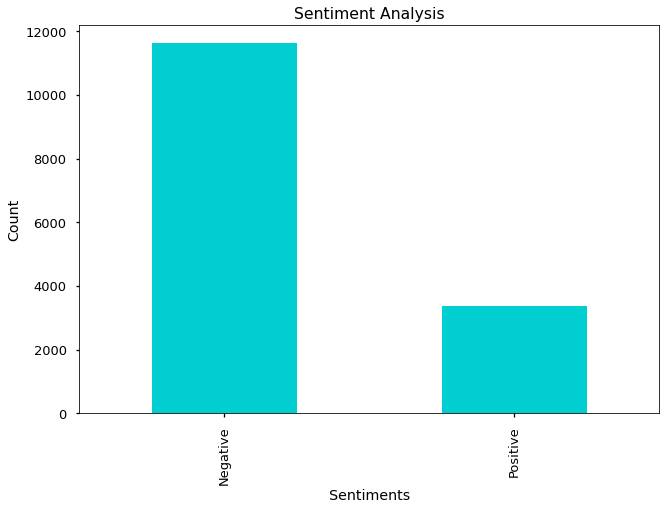

In [ ]:
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
logisticreg['sentiment'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show

In [ ]:
#show counts
logisticreg['sentiment'].value_counts()

Negative    11623
Positive     3377
Name: sentiment, dtype: int64

In [ ]:
strres['accuracy']


0.8386

In [ ]:
svmac

0.9091395833333333

In [ ]:
logacc

0.89

# Project Report

# Introduction
As per the task assigned to us, we developed a sentiment analyzer to get general sentiments to tweets. In thisnotebook, the selected company was Tesla.

# Discussions
The tweets were scrapped, numbering 15,000. This data was unsupervised. A supervised dataset was fetched in order to train our models and to test its accuracy. Using an inbulit Multinomial Naive Bayes analysis to test for the testing data accuracy which was at 0.95 or 95% accuracy. After training the Naive Bayes sentiment analyzer we came up with, testing was done with the tesla tweets. The results show that there is negative sentiments towards tesla with 6420 being negative and 6346 being positive and 2234 being neutral. The SVM had a result of 10000 negstive tweets and 5000 positive tweets. It is to be noted that there was no neutral sentiment. The second SVM had a result of 8000 negative tweets and 6000 positive tweets with an accuracy of 0.83 or 83%. The logistic regression model had 11623 negative tweets and 3377 positive tweets with an accuracy of 0.89 or 89%.
#Conclusion
The general sentiments towards tesla is negative. The reasons vary but may be assoiciated with the general perception towards electric cars or tesla as a company. 



